<a href="https://colab.research.google.com/github/yesicachimitt/proyecto_integrado_2/blob/main/Educacion_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# prompt: arme un dataframe de al menos 100 filas con datos random con apellido y nombre, nro_dni, materias de educacion nivel secundario de la argentina que contenga las siguientes columnas: materia escolar, nota 1er Trimestre, nota 2do Trimestre, nota 3er Trimestre, Faltas a clases.

import pandas as pd
import numpy as np
import random

# Lista de materias escolares argentinas de nivel secundario
materias = [
    "Matemática", "Lengua y Literatura", "Historia", "Geografía", "Ciencias Naturales",
    "Educación Física", "Inglés", "Física", "Química", "Biología", "Filosofía", "Sociología",
    "Arte", "Música", "Informática"
]

# Función para generar un nombre y apellido aleatorio
def generar_nombre_apellido():
  nombres = ["Juan", "Pedro", "Maria", "Laura", "Carlos", "Ana", "Diego", "Sofia", "Martin", "Valentina"]
  apellidos = ["Gomez", "Perez", "Rodriguez", "Lopez", "Gonzalez", "Fernandez", "Martinez", "Sanchez", "Romero", "Diaz"]
  return f"{random.choice(nombres)} {random.choice(apellidos)}"


# Crear una lista de datos para el DataFrame
data = []
for i in range(100):
  nombre_apellido = generar_nombre_apellido()
  dni = np.random.randint(10000000, 99999999)
  materia = random.choice(materias)
  nota1 = np.random.randint(1, 11)
  nota2 = np.random.randint(1, 11)
  nota3 = np.random.randint(1, 11)
  faltas = np.random.randint(0, 15)
  data.append([nombre_apellido, dni, materia, nota1, nota2, nota3, faltas])

# Crear el DataFrame
df = pd.DataFrame(data, columns=["Nombre y Apellido", "Nro DNI", "Materia Escolar", "Nota 1er Trimestre", "Nota 2do Trimestre", "Nota 3er Trimestre", "Faltas a Clases"])

df

,Nombre y Apellido,Nro DNI,Materia Escolar,Nota 1er Trimestre,Nota 2do Trimestre,Nota 3er Trimestre,Faltas a Clases
0,Pedro Fernandez,35571458,Física,2,9,1,3
1,Pedro Sanchez,80657901,Historia,10,9,9,2
2,Diego Romero,39607492,Inglés,3,9,1,14
3,Martin Romero,74941085,Educación Física,6,9,2,0
4,Carlos Romero,78220825,Ciencias Naturales,1,9,6,1
...,...,...,...,...,...,...,...
95,Sofia Romero,91992181,Química,7,3,1,10
96,Diego Gomez,28996162,Química,5,3,8,0
97,Diego Lopez,64638280,Biología,2,9,1,13
98,Ana Gonzalez,26728315,Educación Física,1,8,9,14


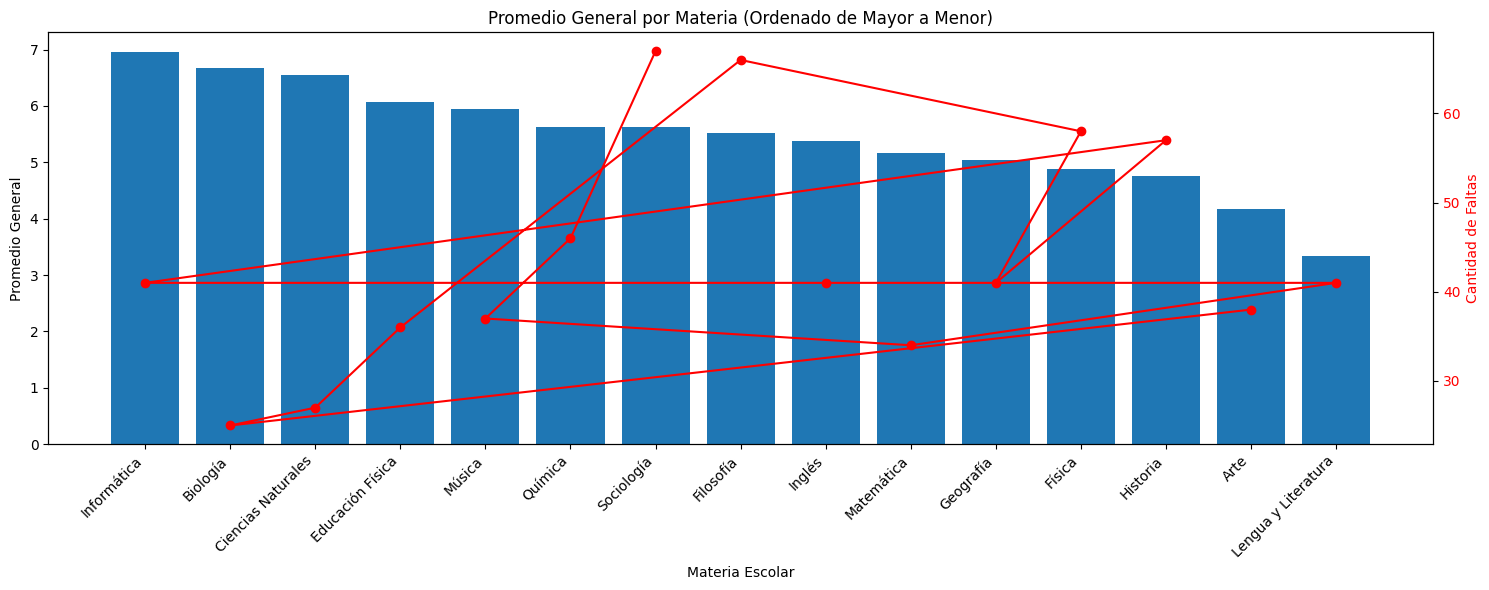

In [3]:
# prompt: Armar grafico de barras con Promedio general de cada materia, ordenados de mayor a menor, agregar las faltas como valor constrastable en dos ejes. Agregar las leyendas que ayuden a la interpretación.

import matplotlib.pyplot as plt

# Calcular el promedio de cada materia
promedio_materias = df.groupby('Materia Escolar')[['Nota 1er Trimestre', 'Nota 2do Trimestre', 'Nota 3er Trimestre']].mean().mean(axis=1)

# Ordenar de mayor a menor
promedio_materias_ordenado = promedio_materias.sort_values(ascending=False)

# Calcular la cantidad de faltas por materia
faltas_por_materia = df.groupby('Materia Escolar')['Faltas a Clases'].sum()

# Crear el gráfico de barras
plt.figure(figsize=(15, 6))
ax1 = plt.bar(promedio_materias_ordenado.index, promedio_materias_ordenado.values)
plt.xlabel('Materia Escolar')
plt.ylabel('Promedio General')
plt.title('Promedio General por Materia (Ordenado de Mayor a Menor)')
plt.xticks(rotation=45, ha='right')


# Agregar un segundo eje y para las faltas
ax2 = plt.twinx()
ax2.plot(faltas_por_materia.index, faltas_por_materia.values, color='red', marker='o')
ax2.set_ylabel('Cantidad de Faltas', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Ajustar el espacio entre las barras y las etiquetas del eje x
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [ ]:
df.to_csv("datos_alumnos.csv", index=False)
